# **Multivariable Linear Regression Model**

<div align="center">
    <img src="./img/multiple-regression.png" width="50%">
</div>

In [34]:
"""
dado n features
    x1, x2, ..., xn
target
    h(x)  = w0 * 1 + w1 * x1 + w2 * x2 + ... + wn * xn   hiperplano
    h(x) = w . x
parametros
    w0, w1, w2, ..., wn
goal
    minimizar(E(w0, w1, w2, ..., wn))
"""

'\ndado n features\n    x1, x2, ..., xn\ntarget\n    h(x)  = w0 * 1 + w1 * x1 + w2 * x2 + ... + wn * xn   hiperplano\n    h(x) = w . x\nparametros\n    w0, w1, w2, ..., wn\ngoal\n    minimizar(E(w0, w1, w2, ..., wn))\n'

In [35]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import random

In [36]:
df = pd.read_csv("./data/data1.csv")
df.columns = ["w0", "medv", "age", "lstat"]
df.loc[:, "w0"] = 1     # bias

x = df[["w0", "age", "lstat"]].to_numpy()
y = np.array(df["medv"])

display(x.shape, y.shape)
display(x, y)

(506, 3)

(506,)

array([[ 1.  , 65.2 ,  4.98],
       [ 1.  , 78.9 ,  9.14],
       [ 1.  , 61.1 ,  4.03],
       ...,
       [ 1.  , 91.  ,  5.64],
       [ 1.  , 89.3 ,  6.48],
       [ 1.  , 80.8 ,  7.88]])

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [37]:
# normalization
x_norm = x.copy()
y_norm = y.copy()
r, c = x_norm.shape     # rows (training sample), columns (features)

for j in range(1, c):
    # Get max and min for each column
    # * indexing: [row, column]
    max_x = np.amax(x_norm[:,j])        # indexing [row, column]
    min_x = np.amin(x_norm[:,j])
    
    x_norm[:,j] = np.array([
        (e - min_x)/(max_x - min_x) 
        for e in x_norm[:,j]
        ])

max_y = np.amax(y_norm)
min_y = np.amin(y_norm)
y_norm = np.array([( e - min_y)/(max_y - min_y) for e in y_norm])

# see more in: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

Text(0.5, 0, 'medv')

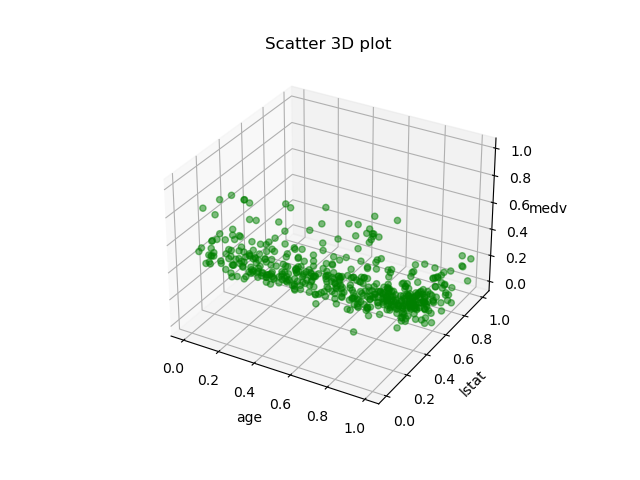

In [38]:
# 3D plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x_norm[:,1], x_norm[:,2], y_norm, color='green', alpha=0.5)
ax.set_title('Scatter 3D plot')
ax.set_xlabel('age')
ax.set_ylabel('lstat')
ax.set_zlabel('medv')

In [39]:
# 70% for train and 30% test
np.random.seed(0)
m, = y.shape
idx = np.array(np.arange(m))
include_idx = set(np.random.choice(idx, size = int(0.7*m), replace=False))
mask = np.array([(i in include_idx) for i in range(m)])

trainX = x_norm[mask]
testX = x_norm[~mask]

trainY = y_norm[mask]
testY = y_norm[~mask]

print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

(354, 3) (354,)
(152, 3) (152,)


Text(0.5, 0, 'medv')

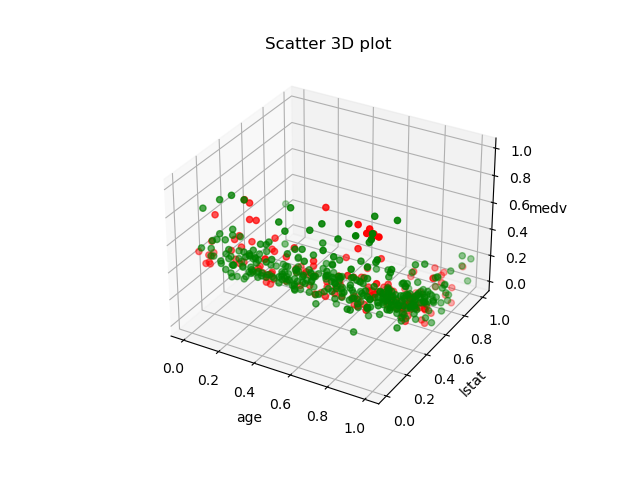

In [40]:
# 3D PLOT
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(trainX[:,1], trainX[:,2], trainY, color='green')
ax.scatter(testX[:,1], testX[:,2], testY, color='red')
ax.set_title('Scatter 3D plot')
ax.set_xlabel('age')
ax.set_ylabel('lstat')
ax.set_zlabel('medv')

In [41]:
def plot_3D(W_curr):
    l_x = np.linspace(0, 1, 100)
    l_y = np.linspace(0, 1, 100)
    l_x, l_y = np.meshgrid(l_x, l_y)
    l_z = W_curr[0] + W_curr[1]*l_x + W_curr[2]*l_y

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(l_x, l_y, l_z, alpha=0.4, color="blue")
    
    ax.scatter(
        trainX[:,1], trainX[:,2], trainY, 
        color='green', alpha=0.3
    )
    ax.scatter(
        testX[:, 1], testX[:, 2], testY, 
        color='red', alpha=0.4
    )
    ax.set_title(f'{round(W_curr[0], 3)} + {round(W_curr[1], 3)}*age + {round(W_curr[2], 3)}*lstat')
    ax.set_xlabel('age')
    ax.set_ylabel('lstat')
    ax.set_zlabel('mdev')
    ax.view_init(10, 45)

## **Hypothesis**
For $n$ features:

$$h(x^{(i)}) = w_0*x^{(i)}_0 + w_1 * x^{(i)}_1 + w_2 * x^{(i)}_2 + w_n * x^{(i)}_n$$

Where:

$$x_0 = \text{implicit } 1$$

And exists $n + 1$ variables to predict. Then:

Viewing at it as arrays where each row of matrix $x$ is a training example and exists $j$ training examples, we have:

$$
x = 
\begin{bmatrix} 
1 & x_{1,1} & ... & x_{1,n} \\
1 & x_{2,1} & ... & x_{2,n} \\
1 & ... & ... & ... \\
1 & x_{j,1} & ... & x_{j,n}
\end{bmatrix}_{j*(n+1)}
$$ 

Rows are training samples.

Columns are bias and features.

And $x^{(j)}_{n}$ represents "the j-th value of the n-th feature" or "the n-th feature of the j-th training example". In addition:

$$w = \begin{bmatrix} w_0 & w_1 & ... & w_n \end{bmatrix}_{1*(n+1)}$$

$$
y = \begin{bmatrix} y_1 & y_2 & ... & y_j \end{bmatrix}_{1*j}
$$

Thus:

$$h(x_j) = x_j * w^t$$

$$
h(x_j) = 
\begin{bmatrix} 1 & x_{j,1} & ... & x_{j,n}\end{bmatrix}_{1*(n+1)} *
\begin{bmatrix} w_0 \\ w_1 \\ ... \\ w_n \end{bmatrix}_{(n+1)*1} 
= \text{model prediction}
$$


In [42]:
def h(x, w):
  return np.sum(np.multiply(x, w))

## **Loss Function**

$$L(x) = \text{Error} = \frac{1}{2m}\sum_{i=0}^m (y_i - h(x_i))^2$$

In [43]:
def error(y, x, w):
  m, = y.shape
  e = 0
  for j in range(m):
    # for each row (training sample)
    sum = (float(y[j] - h(x[j,:], w))**2)
    e = e + sum
  return e/(2.0*m)

## **Gradient Descent**
$$
\frac{\partial{L}}{\partial{w_0}} = \frac{1}{m}\sum_{i=0}^m(y_i - h(x^i))(-1) \\
\frac{\partial{L}}{\partial{w_{j\neq 0}}} = \frac{1}{m}\sum_{i=0}^m(y_i - h(x^i))(-x^{i}_{j})
$$

where $m$ are the number of training examples.

In [44]:
def derivada(x,y,params):
  #implementar las derivadas
  m, = y.shape
  r, c = x.shape

  # first derivative
  derivatives = np.array(
    [ sum([(y[i] - h(x[i,:],params))*-1 for i in range(m)])/(m*1.0) ]   # derivada del bias
  )
  
  for j in range(1, c):
    # iterate over each feature in a row
    der = sum(
      [
        (y[i] - h(x[i,:], params)) * -x[i, j]
      for i in range(m)
      ]
    ) / (m*1.0)
    derivatives = np.append(derivatives, der)
  
  return derivatives

In [45]:
def update(params, alfa, deriv):
  return params - alfa * deriv

In [46]:
arrL = []
arrW = []
def train(x, y, umbral, alfa):
    """
    x: todas las features/variables dependientes
    y: variable independiente
    umbral: error minimo, control de convergencia
    max_iter: numero maximo de iteraciones
    alfa: parametro que escala la gradiente, learning rate
    """
    W = np.array([
        np.random.uniform(0, 10)
        for _ in range(len(x[0, :]))
        ])  # random initialization
    print(W)

    i = 0
    L = error(y, x, W)
    while L > umbral:
        derivatives = np.array(derivada(x, y, W))
        W = update(W, alfa, derivatives)
        L = error(y,x,W) 

        arrL.append(L)
        arrW.append(W)
        i = i + 1
    print(f"\n{i} epochs")
    return W

# Train

In [47]:
arrL = []
arrW = []
W = train(trainX, trainY, 0.0099999, 0.05)
print(W)

[4.59855884 0.44612301 7.99795885]

3047 epochs
[ 0.59947721 -0.09348052 -0.50195229]


In [48]:
arrW = np.array(arrW)
print(len(arrW))
print(arrW)

3047
[[ 4.25284291  0.19837992  7.87705646]
 [ 3.93454054 -0.02974912  7.76501274]
 [ 3.64148995 -0.23981008  7.66113025]
 ...
 [ 0.59951255 -0.09380603 -0.5013403 ]
 [ 0.59949487 -0.09364319 -0.50164645]
 [ 0.59947721 -0.09348052 -0.50195229]]


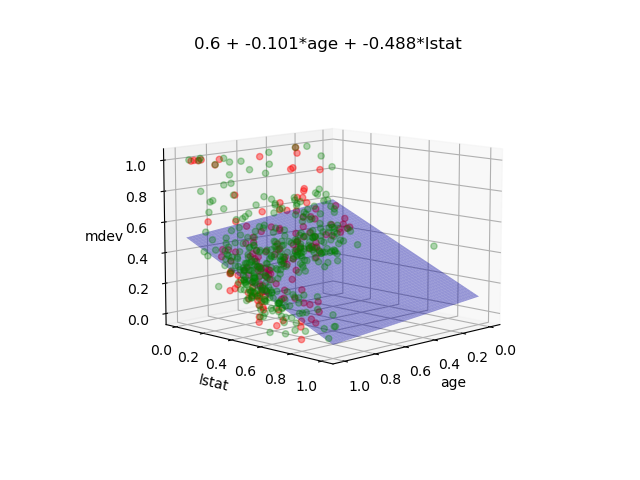

In [49]:
plot_3D(arrW[3000])

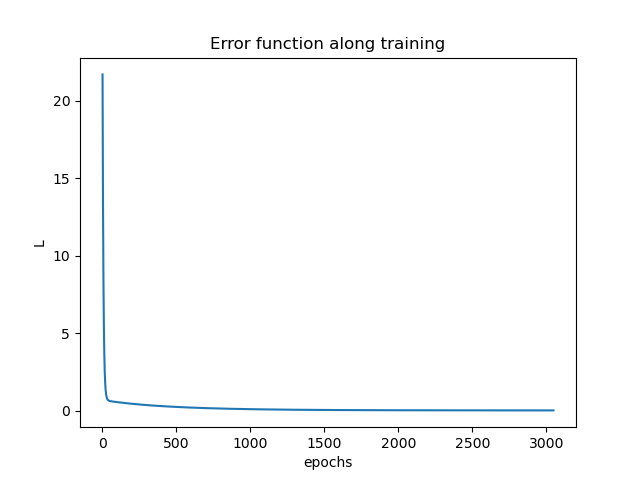

In [50]:
# 2D PLOT
aux_arrL = arrL[:]
fig = plt.figure()
plt.title("Error function along training")
plt.ylabel("L")
plt.xlabel("epochs")
plt.plot(np.arange(1,len(aux_arrL)+1), aux_arrL)

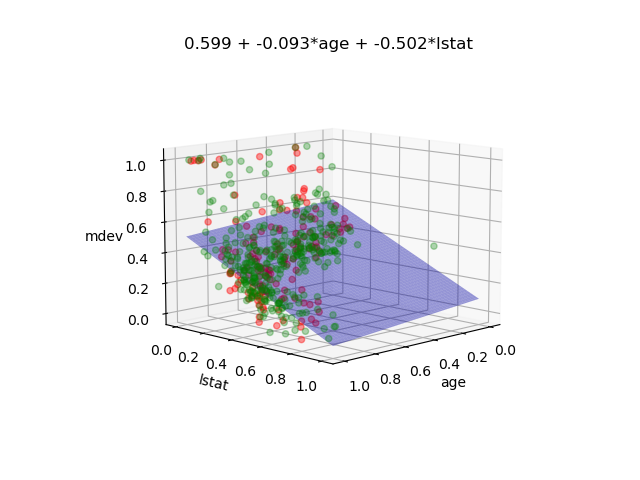

In [51]:
# 3D PLOT
plot_3D(W)

# Test

In [52]:
# error on test
print(f"Error on test: {error(testY, testX, W) * 2}")

Error on test: 0.02498833566891026


# MLR with sklearn

In [53]:
# multivarible linear regression with sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


reg = LinearRegression().fit(trainX[:,1:], trainY)
print(f"Intercept: {reg.intercept_}")
print(f"Coef: {reg.coef_}")

print(f"Error on train: {mean_squared_error(trainY, reg.predict(trainX[:,1:])) * 2}")
print(f"Error on test: {mean_squared_error(testY, reg.predict(testX[:,1:])) * 2}")

print(f"R2 score on train: {r2_score(trainY, reg.predict(trainX[:,1:]))}")
print(f"R2 score on test: {r2_score(testY, reg.predict(testX[:,1:]))}")

Intercept: 0.5822482300929552
Coef: [ 0.06433283 -0.79836615]
Error on train: 0.035336566211008856
Error on test: 0.042569169493055226
R2 score on train: 0.5416756594439919
R2 score on test: 0.5645241020384619


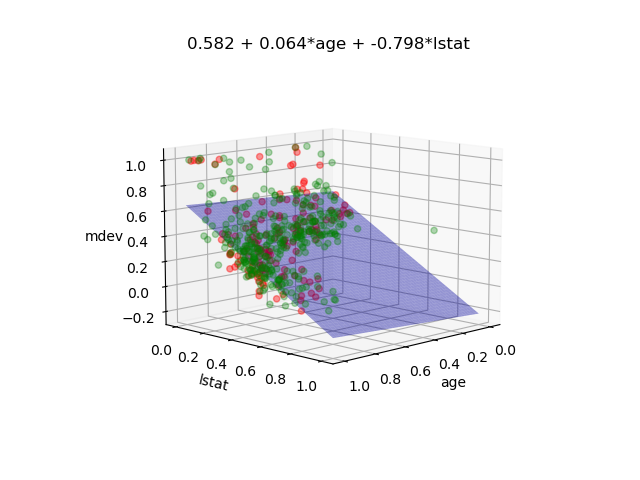

In [54]:
plot_3D([reg.intercept_, reg.coef_[0], reg.coef_[1]])